<a href="https://colab.research.google.com/github/HafidzSetyawan/PCVK_MuhammadHafidzSetyawan_2024/blob/main/Praktikum_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : MUHAMMAD HAFIDZ SETYAWAN

NIM : 244107027013

MATKUL : PENGOLAHAN CITRA DAN VISI KOMPUTER

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan : 60


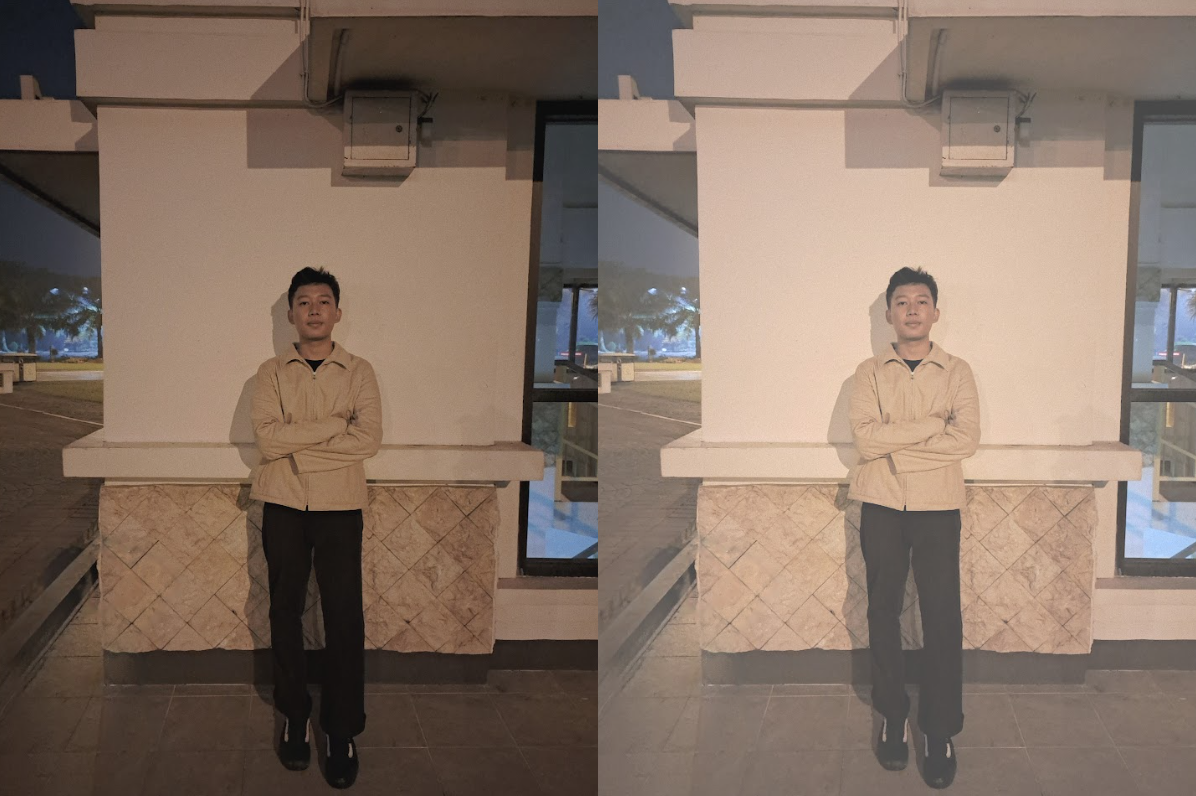

In [12]:
print("Mengubah tingkat kecerahan citra")
print("--------------------------------")
try:
  brightness = int(input("Masukkan nilai kecerahan : "))
except ValueError:
  print("Err0r, not a number")

original = cv2.imread('/content/drive/MyDrive/PCVK_2024/foto_hafidz.png')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv2.hconcat([original, brightness_image])
cv2_imshow(final_frame)

# **TUGAS PRAKTIKUM**

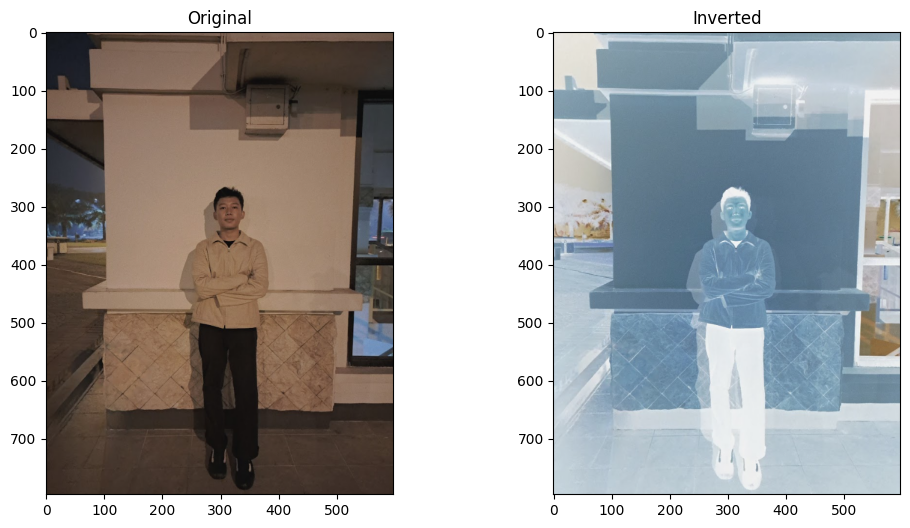

In [14]:
original = cv2.imread('/content/drive/MyDrive/PCVK_2024/foto_hafidz.png')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Fungsi inverse citra
def inverse_image(image):
    return 255 - image

# Terapkan inverse
inverted = inverse_image(original)

# Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(original), plt.title('Original')
plt.subplot(122), plt.imshow(inverted), plt.title('Inverted')
plt.show()

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


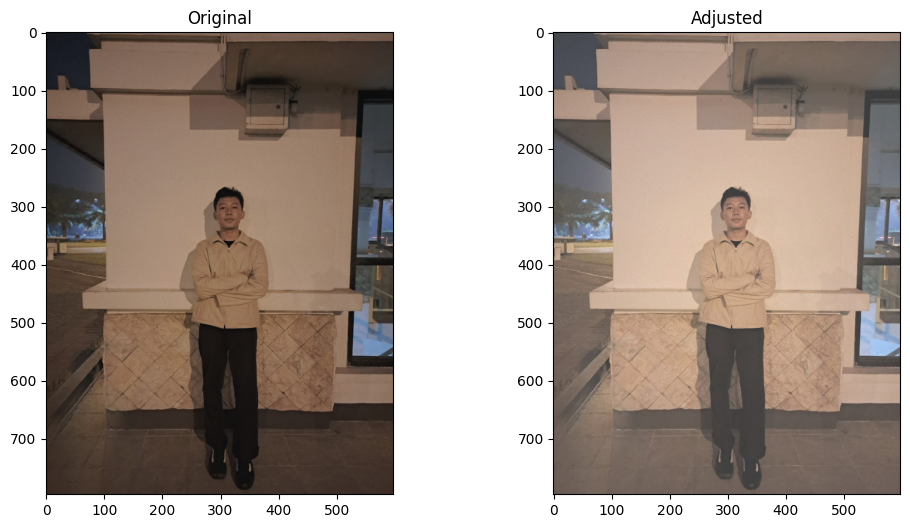

In [15]:
print("Mengubah kontras dan tingkat kecerahan citra")
print("--------------------------------------------")

# Baca gambar
original = cv2.imread('/content/drive/MyDrive/PCVK_2024/foto_hafidz.png')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

def adjust_brightness_contrast(image, brightness, contrast):
    # Pertama, terapkan perubahan kecerahan
    adjusted = image.astype(np.float32) + brightness

    # Kemudian, terapkan perubahan kontras
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    adjusted = factor * (adjusted - 128) + 128

    # Pastikan nilai piksel tetap dalam rentang 0-255
    return np.clip(adjusted, 0, 255).astype(np.uint8)

# Input dari pengguna
try:
    brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
    contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))
except ValueError:
    print("Error: Input harus berupa angka")
    exit()

# Terapkan perubahan kecerahan dan kontras
adjusted = adjust_brightness_contrast(original, brightness, contrast)

# Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(original), plt.title('Original')
plt.subplot(122), plt.imshow(adjusted), plt.title('Adjusted')
plt.show()

Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------------------------------
Masukkan nilai kecerahan : 80


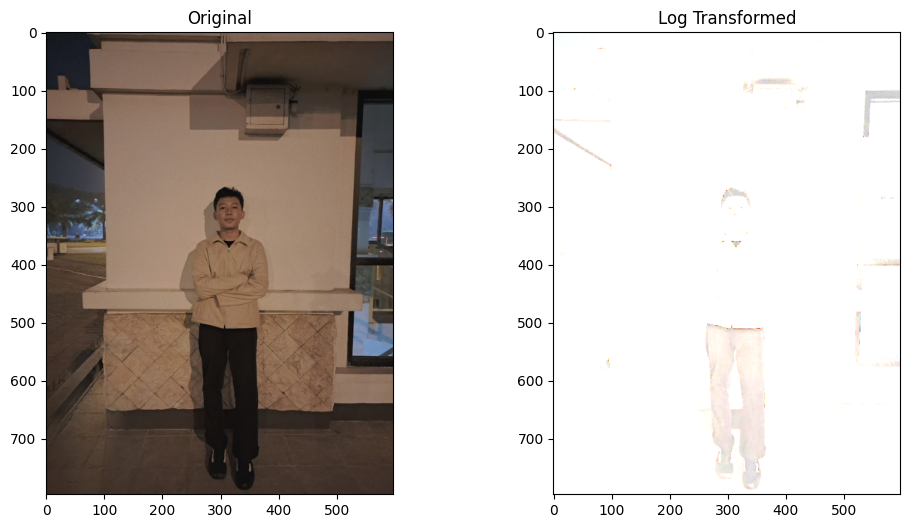

In [17]:
print("Mengubah tingkat kecerahan citra dengan transformasi log")
print("--------------------------------------------------------")
original = cv2.imread('/content/drive/MyDrive/PCVK_2024/foto_hafidz.png')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

def log_transform(image, c):
    return c * np.log1p(image.astype(np.float32))

# Terapkan log transform
try:
  c = int(input("Masukkan nilai kecerahan : "))
except ValueError:
  print("Err0r, not a number")

log_transformed = log_transform(original, c)
log_transformed = np.clip(log_transformed, 0, 255).astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(original), plt.title('Original')
plt.subplot(122), plt.imshow(log_transformed), plt.title('Log Transformed')
plt.show()

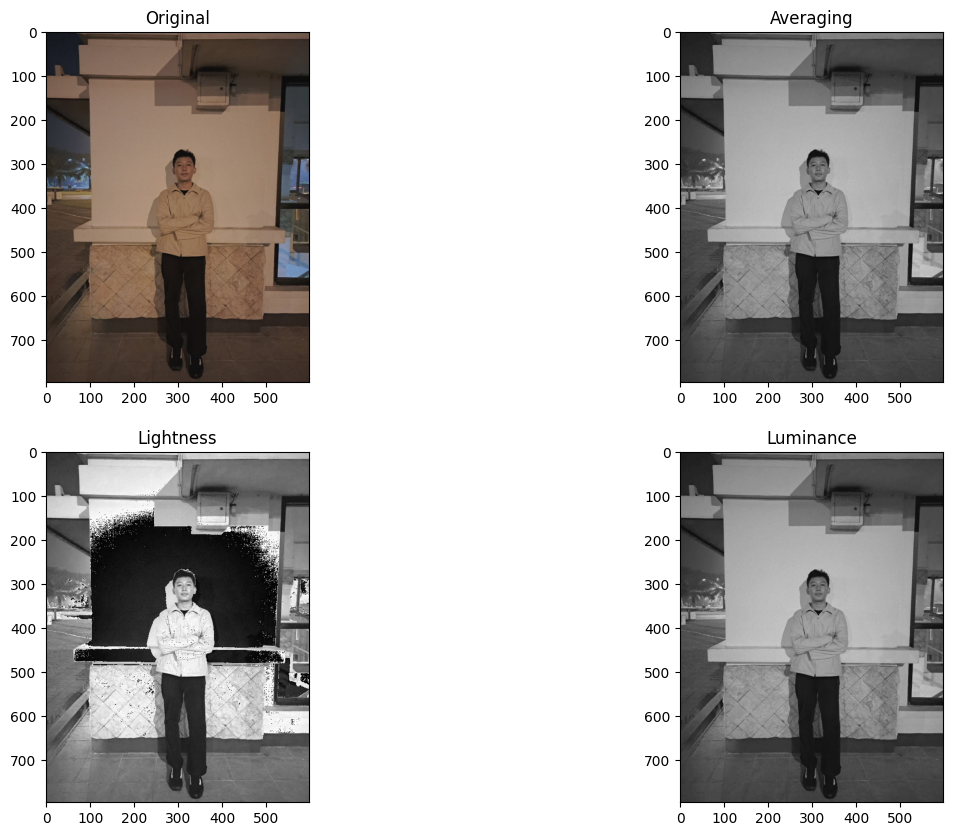

In [21]:
original = cv2.imread('/content/drive/MyDrive/PCVK_2024/foto_hafidz.png')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

def grayscale_averaging(image):
    return np.mean(image, axis=2).astype(np.uint8)

def grayscale_lightness(image):
    return ((np.max(image, axis=2) + np.min(image, axis=2)) / 2).astype(np.uint8)

def grayscale_luminance(image):
    return (0.21 * image[:,:,0] + 0.72 * image[:,:,1] + 0.07 * image[:,:,2]).astype(np.uint8)

# Terapkan metode grayscale
gray_avg = grayscale_averaging(original)
gray_lightness = grayscale_lightness(original)
gray_luminance = grayscale_luminance(original)

# Tampilkan hasil
plt.figure(figsize=(15, 10))
plt.subplot(221), plt.imshow(original), plt.title('Original')
plt.subplot(222), plt.imshow(gray_avg, cmap='gray'), plt.title('Averaging')
plt.subplot(223), plt.imshow(gray_lightness, cmap='gray'), plt.title('Lightness')
plt.subplot(224), plt.imshow(gray_luminance, cmap='gray'), plt.title('Luminance')
plt.show()

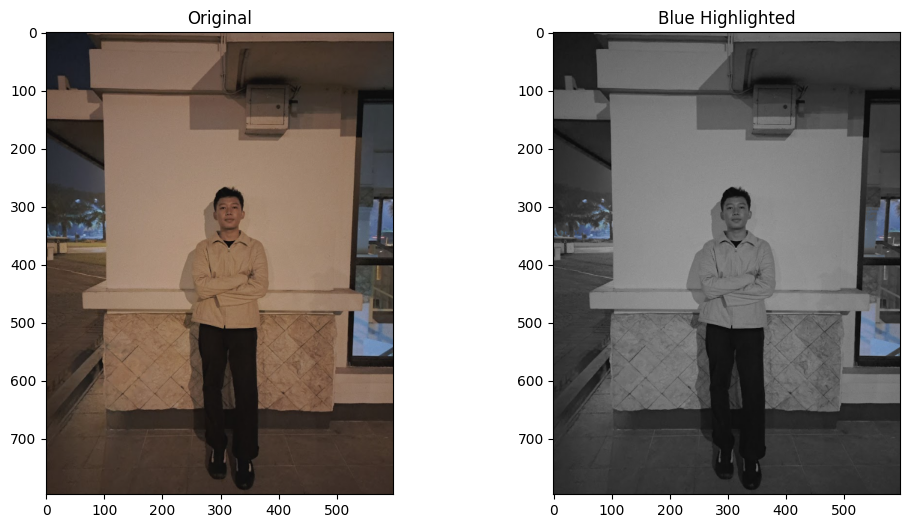

In [22]:
original = cv2.imread('/content/drive/MyDrive/PCVK_2024/foto_hafidz.png')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

def blue_highlight(image):
    # Konversi ke grayscale menggunakan metode luminance
    gray = (0.21 * image[:,:,0] + 0.72 * image[:,:,1] + 0.07 * image[:,:,2]).astype(np.uint8)

    # Buat mask untuk warna biru
    blue_mask = (image[:,:,2] > 100) & (image[:,:,2] > image[:,:,1]) & (image[:,:,2] > image[:,:,0])

    # Buat gambar hasil
    result = np.dstack([gray, gray, gray])
    result[blue_mask] = image[blue_mask]

    return result

# Terapkan highlight biru
blue_highlighted = blue_highlight(original)

# Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(original), plt.title('Original')
plt.subplot(122), plt.imshow(blue_highlighted), plt.title('Blue Highlighted')
plt.show()